shape: (10, 4)
┌────────────────────────┬─────────┬───────┬───────┐
│ func-head              ┆ runtime ┆ Start ┆ End   │
│ ---                    ┆ ---     ┆ ---   ┆ ---   │
│ str                    ┆ f64     ┆ f64   ┆ f64   │
╞════════════════════════╪═════════╪═══════╪═══════╡
│ think(() kw={})        ┆ 10.01   ┆ 0.0   ┆ 10.01 │
│ turbo_thrash(() kw={}) ┆ 6.18    ┆ 10.01 ┆ 16.19 │
│ think(() kw={})        ┆ 10.01   ┆ 16.19 ┆ 26.2  │
│ turbo_thrash(() kw={}) ┆ 5.72    ┆ 26.2  ┆ 31.92 │
│ ...                    ┆ ...     ┆ ...   ┆ ...   │
│ think(() kw={})        ┆ 10.01   ┆ 47.59 ┆ 57.6  │
│ turbo_thrash(() kw={}) ┆ 5.68    ┆ 57.6  ┆ 63.28 │
│ think(() kw={})        ┆ 10.0    ┆ 63.28 ┆ 73.28 │
│ turbo_thrash(() kw={}) ┆ 5.8     ┆ 73.28 ┆ 79.08 │
└────────────────────────┴─────────┴───────┴───────┘
{'func-head': 'think(() kw={})', 'runtime': 10.01, 'Start': 0.0, 'End': 10.01}
{'func-head': 'turbo_thrash(() kw={})', 'runtime': 6.18, 'Start': 10.009999999999998, 'End': 16.189999999999998

C:\Users\pmayn\AppData\Local\Temp\ipykernel_10104\2954261131.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


TypeError: hlines() missing 2 required positional arguments: 'xmin' and 'xmax'

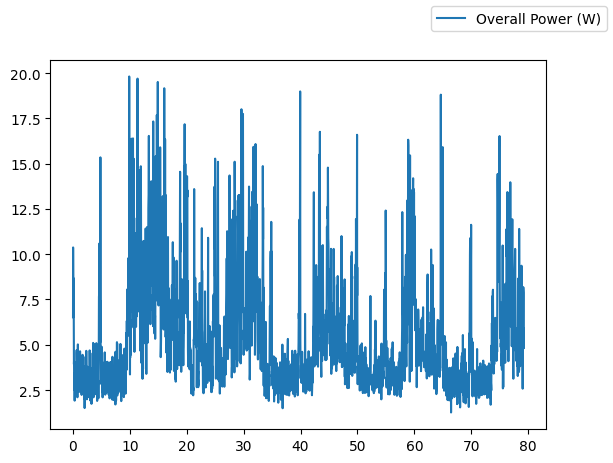

In [30]:
import polars as pl
import matplotlib.pyplot as plt
import csv
import numpy as np

# getting the power usage statistics

powerdata = "data\power-logs\PowerLog-2023-04-07 14-03-06.295516"

df = pl.read_csv(powerdata)

df = df.with_columns([
    pl.col("System Time").str.strptime(pl.Time, fmt="%H:%M:%S:%f",strict=False).cast(pl.Time, strict=False),    
])

timedata = "data\\intervals\\temp.csv"
timing = pl.read_csv(timedata)
#timing.select(pl.cumsum('runtime'))
timing = timing.with_columns([
    pl.cumsum('runtime').alias("Start") - pl.col('runtime'),
    pl.cumsum('runtime').alias("End"), 
])

print(timing)


fig, ax = plt.subplots()

timeline = df.select(pl.col("Elapsed Time (sec)"))
#ax.plot(timeline, df.select(pl.col("Cumulative Processor Energy_0(Joules)")), label="Cumulative Energy (J)")
ax.plot(timeline, df.select(pl.col("Processor Power_0(Watt)")), label= "Overall Power (W)")
fig.legend()
fig.show()

for row in timing.rows(named=True):
    print(row)
plt.hlines(10, )

#------------------------------------------------------------------------
